<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-07 18:07:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  39.9MB/s    in 4.9s    

2025-09-07 18:07:08 (40.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


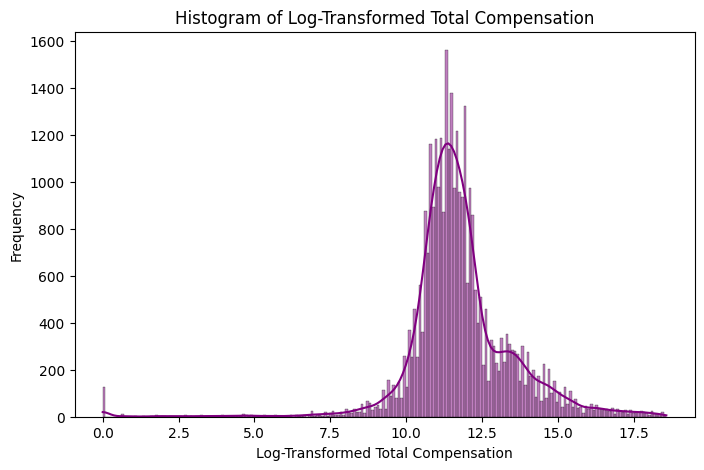

In [9]:
# Query data
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)

# Convert to numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99].copy()

# Apply log transformation
df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered["LogCompTotal"], bins='auto', kde=True, color="purple")

# Labels and title
plt.xlabel("Log-Transformed Total Compensation")
plt.ylabel("Frequency")
plt.title("Histogram of Log-Transformed Total Compensation")

# Show plot
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


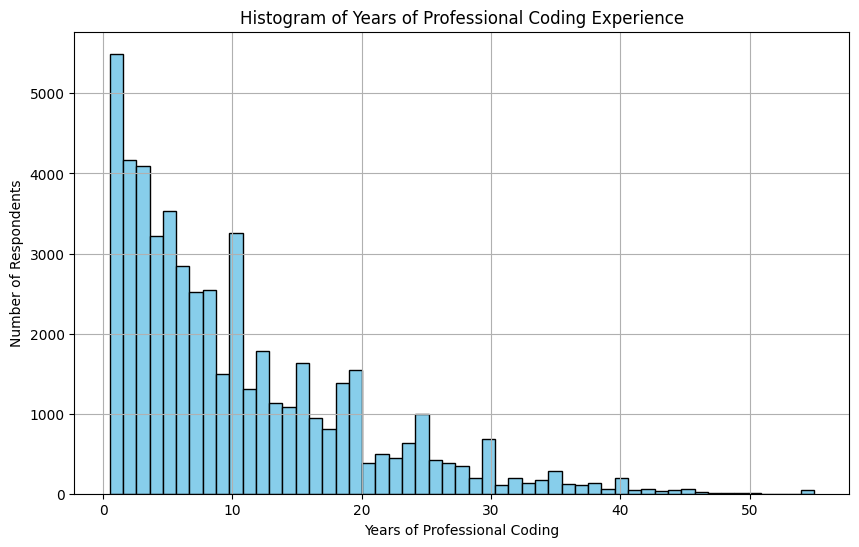

In [10]:
## Write your code here
# Pulling data from db
query='''
SELECT YearsCodePro
FROM main
'''
df= pd.read_sql_query(query,conn)

# Changing values for years
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 55
})
#df['YearsCodePro'] = df['YearsCodePro'].fillna(0)
df['YearsCodePro'] = df['YearsCodePro'].dropna()
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])

'''
# Define custom bins and labels
bins = [-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', 'Over 51']

# Apply pd.cut to assign to respective groups and count
df['YearsGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)
years_count = df['YearsGroup'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(years_count.index.astype(str), years_count.values, color='skyblue', edgecolor='black')
plt.xlabel('Years as Professional Coding Experience')
plt.ylabel('Count')
plt.title('Distribution of Professional Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=53, color='skyblue', edgecolor='black')
plt.title('Histogram of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Number of Respondents')
plt.grid(True)

plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


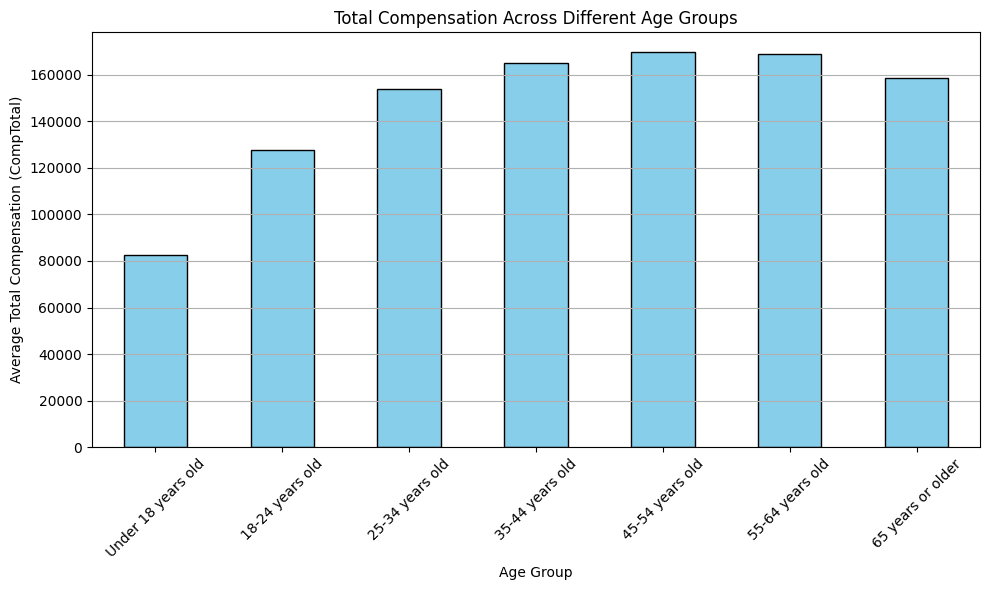

In [11]:
# Pulling data from db
query= '''
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL &
CompTotal IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Ensure that CompTotal is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows where 'CompTotal' or 'Age' is NaN
df.dropna(subset=['CompTotal', 'Age'], inplace=True)

# Remove unrealistic values (e.g., above $1 million)
df = df[df['CompTotal'] < 1_000_000]

# Map the Age column to midpoints of age ranges
mapping_age_group = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}

# Map the 'Age' column to the midpoints of each group
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Define the age groups
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# Calculate the average 'CompTotal' for each age group
age_group_avg_compensation = df.groupby('AgeMapped')['CompTotal'].mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
age_group_avg_compensation.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the x-ticks to be the age group names
plt.xticks(ticks=range(len(age_groups)), labels=age_groups, rotation=45)

# Customize the plot
plt.title('Total Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Total Compensation (CompTotal)')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

Due to the impossibility of making a histogram that makes any sense with these 2 values, I changed it to a horizontal bar chart. Age is categorical in nature, not continuous. It makes no sense to make a histogram without that feature in the data.

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


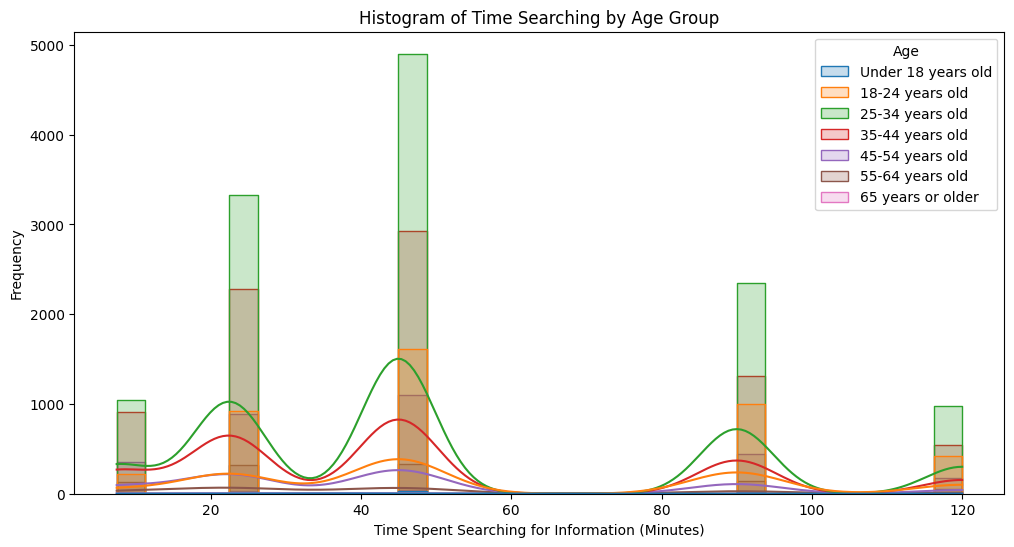

In [12]:
# Define ordered age categories
# Pulling Data
query = '''
SELECT Age, TimeSearching
FROM main
'''
df= pd.read_sql_query(query, conn)

age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old",
    "65 years or older"
]

# Ensure Age is categorical
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

time_search_map = {
    'Less than 15 minutes a day': (15+0)/2,
    '15-30 minutes a day': (30+15)/2,
    '30-60 minutes a day': (60+30)/2,
    '60-120 minutes a day': (120+60)/2,
    'Over 120 minutes a day': 120
}
# Convert TimeSearching to numeric & drop NaNs
df['TimeSearching'] = df['TimeSearching'].map(time_search_map)
df = df.dropna(subset=["TimeSearching", "Age"])  # Drop missing values

# Check if Age has valid categories left
if df["Age"].nunique() > 1:  # Ensure multiple age groups exist
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(data=df, x="TimeSearching", hue="Age", bins=30, kde=True, element="step")

    # Labels and title
    plt.xlabel("Time Spent Searching for Information (Minutes)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Time Searching by Age Group")

    # Ensure legend appears
    handles, labels = ax.get_legend_handles_labels()
    if labels:  # Only add legend if labels exist
        plt.legend(handles, labels, title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show plot
    plt.show()
else:
    print("No valid Age groups available after filtering.")

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


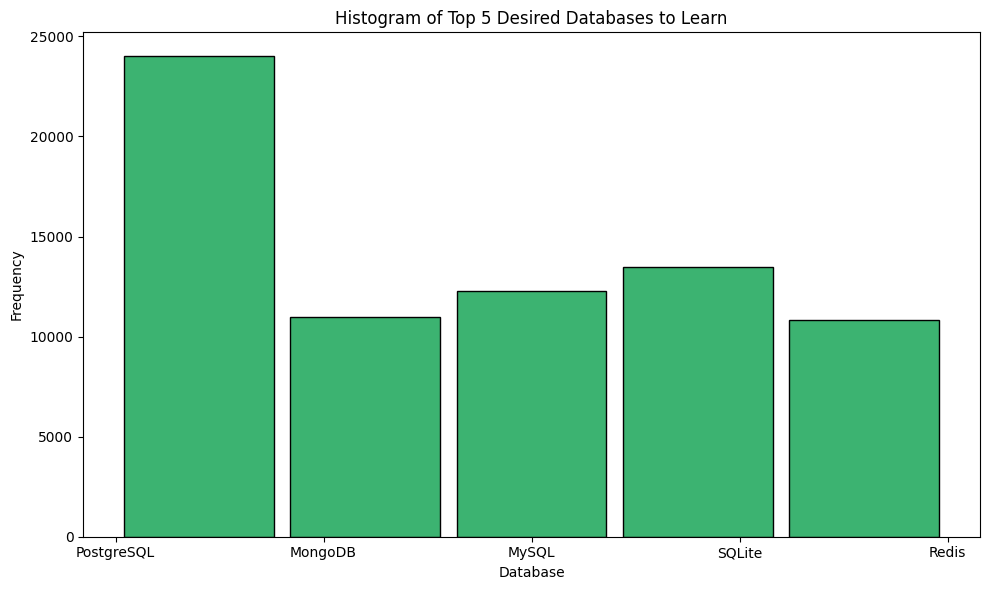

In [13]:
## Write your code here
# Pulling data
query = '''
SELECT DatabaseWantToWorkWith
from main
'''
df = pd.read_sql_query(query, conn)

# Cleaning
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].dropna().str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')
top5 = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5).index.tolist()
filtered = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top5)]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(filtered['DatabaseWantToWorkWith'], bins=len(top5), edgecolor='black', color='mediumseagreen', rwidth=0.9)
plt.title('Histogram of Top 5 Desired Databases to Learn')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


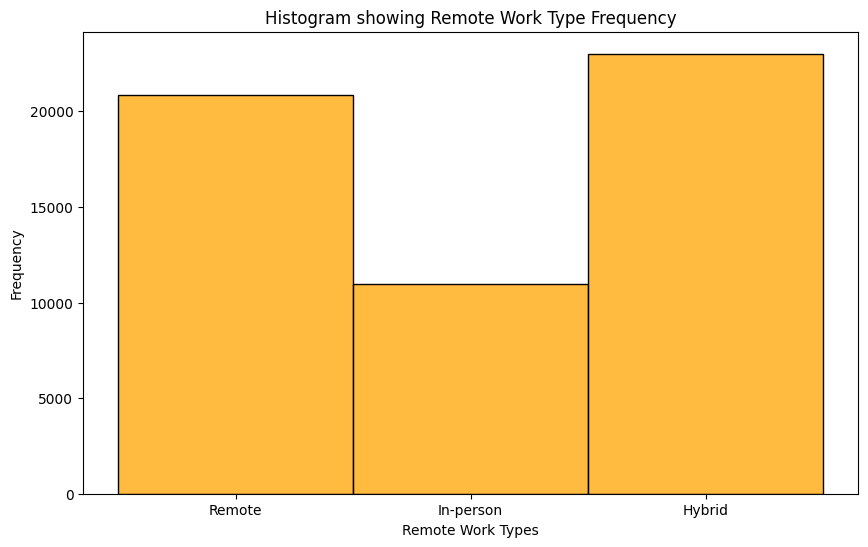

In [14]:
## Write your code here
query = '''
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

df.loc[df['RemoteWork'] == 'Hybrid (some remote, some in-person)', 'RemoteWork'] = 'Hybrid'

plt.figure(figsize=(10,6))
sns.histplot(df['RemoteWork'], bins='auto', color='orange')
plt.xlabel('Remote Work Types')
plt.ylabel('Frequency')
plt.title('Histogram showing Remote Work Type Frequency')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


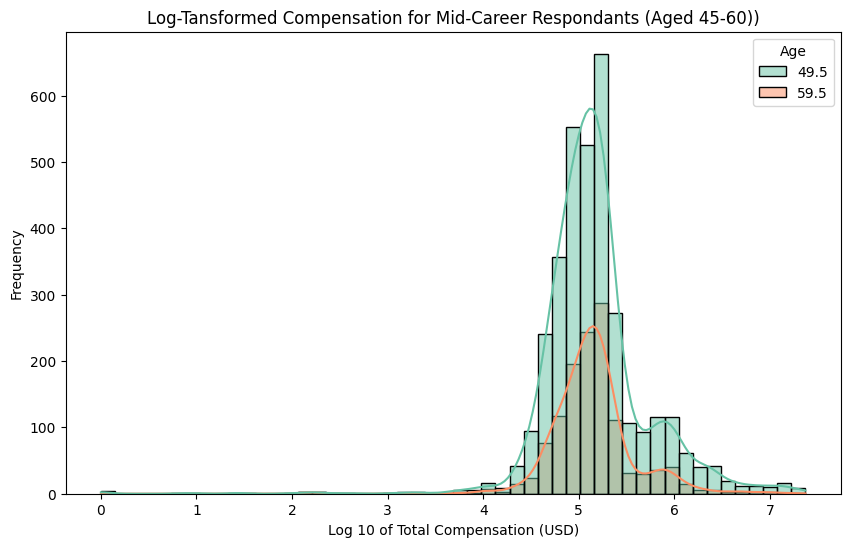

In [15]:
## Write your code here
query='''
SELECT AGE, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
AND CompTotal IS NOT NULL
AND CompTotal >= 1
'''

df = pd.read_sql_query(query, conn)

age_map = {
    '45-54 years old': (54+45)/2,
    '55-64 years old': (64+55)/2
}

df['Age'] = df['Age'].map(age_map)

df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]
df['LogComp'] = np.log10(df['CompTotal'])

plt.figure(figsize=(10,6))
sns.histplot(df, x='LogComp', bins=50, hue='Age', palette='Set2', kde=True)

plt.xlabel('Log 10 of Total Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Log-Tansformed Compensation for Mid-Career Respondants (Aged 45-60))')

plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


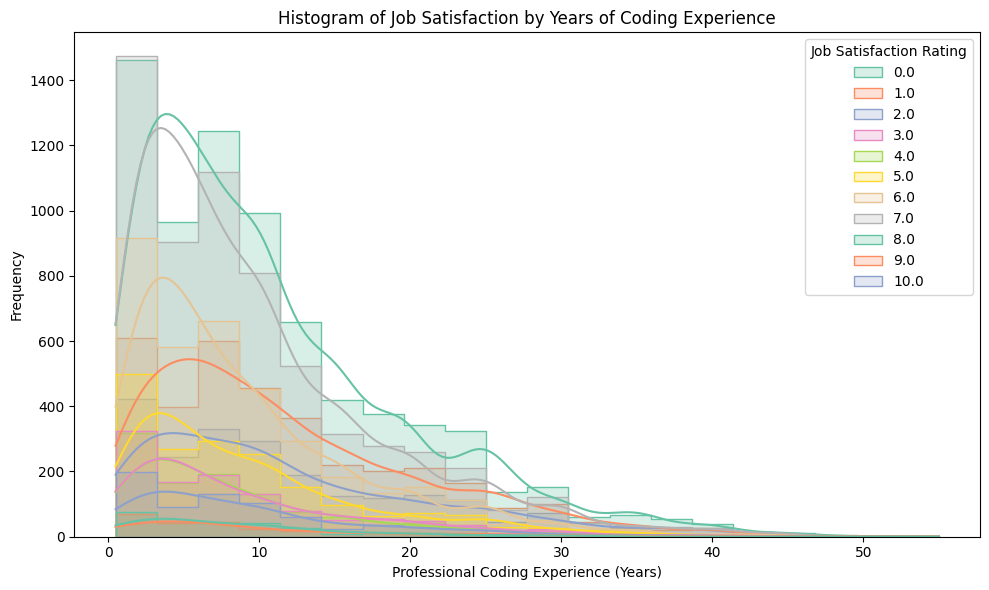

In [16]:
# Pulling data from DB
query = '''
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL
AND YearsCodePro IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

mapping_years = {
    'Less than 1 year': 0.5,
    'More than 50 years': 55
}

# Changing values for years
df['YearsCodePro'] = df['YearsCodePro'].replace(mapping_years)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['JobSat'] = df['JobSat'].astype('category')
df['Job Satisfaction Rating']= df['JobSat']

# Plotting
plt.figure(figsize=(10,6))
sns.histplot(df, x='YearsCodePro', bins= 20, hue='Job Satisfaction Rating', 
             palette='Set2', kde=True, element='step')
plt.title('Job Satification Rating by Years of Professional Coding Experience')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.title("Histogram of Job Satisfaction by Years of Coding Experience")
#plt.legend(title='Job Satisfaction Rating')

# Show plot
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [17]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
